# Problem Statement

* Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban, and rural areas. Customer first applies for a home loan and after that company validates the customer eligibility for the loan.

* A marketing firm wants to launch a promotional campaign in different regions of the country. So, in order to do that, they need to understand which areas they should focus their resources in order to cover the entire region. We are provided with the population data based on different locations along with the demographics. The objective is to segregate the regions into different groups so that the marketing team can plan their resources accordingly. So, we have to apply classification techniques in order to segregate the regions into different clusters which will help the marketing team.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings(action='ignore')

"Libraries Imported"

'Libraries Imported'

# Fetching dataset and creating DataFrame object

In [2]:
data = pd.read_csv('Population_Data.csv')

In [3]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB


As, we can see the presence of comma(,) ,in the integer values, won't let us to work with this data treatinh numerically. For this, the commas must be removed and the data must be converted into integer values.

# Data Preprocessing

In [5]:
def comma_remover(value): #Removes the comma from the value
    return value.replace(',','')

In [6]:
numeric_col = ['Indians','Foreigners','Indian_Male',
               'Indian_Female','Foreigners_Male',
               'Foreigners_Female','Total Population']

In [7]:
for i in numeric_col:
    data[i] = data[i].apply(comma_remover)

In [8]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB


In [10]:
data[numeric_col] = data[numeric_col].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


* Hence, all numerical values are converted into int64
## Checking the integrity of the Dataset

In [11]:
data[['Foreigners','Indians']].sum().sum() - data['Total Population'].sum()

0

In [12]:
data[['Indian_Male','Indian_Female']].sum().sum() - data['Indians'].sum()

0

In [14]:
data[['Foreigners_Male','Foreigners_Female']].sum().sum() - data['Foreigners'].sum()

-112859

* As, we can see that in the foreigners there's an 'Other' category besides Female & Male groups.

In [15]:
data['Foreigners_Other'] = data['Foreigners'] - data['Foreigners_Male']-data['Foreigners_Female']
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Foreigners_Other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [16]:
data['Region'].nunique(), data['Office Location Id'].nunique()

(38, 38)

* The number of unique values of 'Region' & 'Office Location Id' is same and equals to the length of the data. That's why it can't be utilised here.

In [17]:
data1 = data.drop(columns=['Total Population','Region','Office Location Id'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_Other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


# Scaling the dataframe to apply K-Means algorithm

In [18]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
col = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1, columns=col)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_Other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


# Implementing the model

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data1)
pred = kmeans.predict(data1)

pred, len(pred)

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 38)

In [24]:
pd.Series(pred).value_counts()

1    30
0     8
dtype: int64

In [25]:
kmeans.inertia_

0.028113285898827122

In [26]:
kmeans.score(data1)

-0.028113285898827115

In [29]:
def SSE_counter(data, n_cluster):
    '''
    input: data on which we have to work, number of clusters
    output: a list containing the inertia score at different clusters
    number
    '''
    sse = []
    for i in range(1,n_cluster+1):
        kmeans = KMeans(n_jobs=-1, n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

In [42]:
def effect(data, n_cluster):
    '''
    input: data on which we have to work, number of clusters
    output: plots the diagram Inertia vs. # of clusters
    '''
    sse = SSE_counter(data, n_cluster)
    table = pd.DataFrame({
        '# of Clusters': range(1,n_cluster+1),
        'SSE':sse
    })
    # Printing the DataFrame
    print(table.head())
    
    #plotting
    plt.figure(dpi=150,figsize=(10,7))
    plt.plot(table['# of Clusters'],table['SSE'], marker='o')
    plt.xlabel('# of Clusters')
    plt.ylabel('SSE value/Inertia')
    plt.title('Interia vs. # of Clusters')

   # of Clusters       SSE
0              1  0.072260
1              2  0.028113
2              3  0.017667
3              4  0.012200
4              5  0.009471


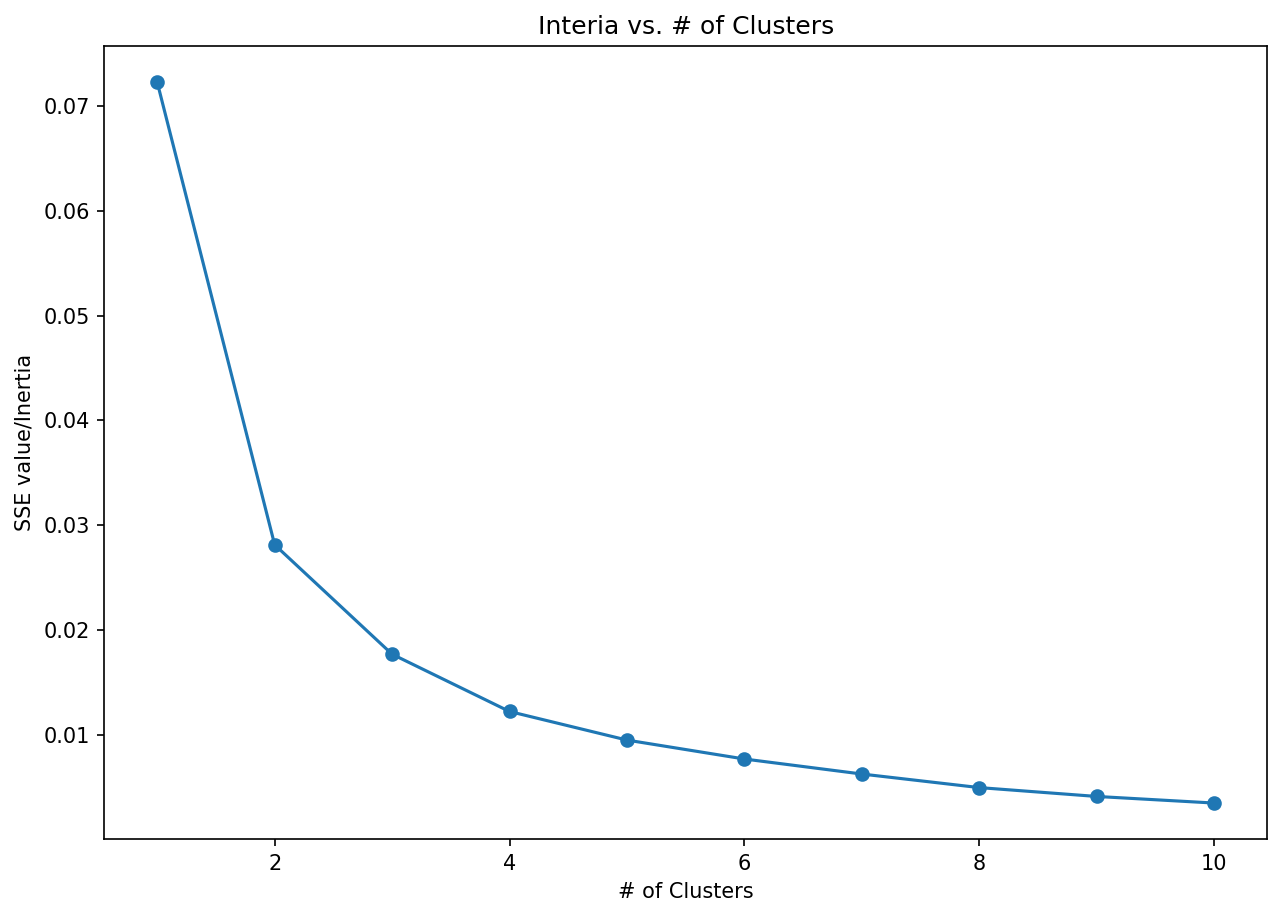

In [36]:
effect(data1, 10)

* According to this plot, the inertia changes significantly from 1 to 2. The change in the range 2 to 4 is still significant though. Here the number of clusters is taken as 4

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [39]:
data1['Clusters'] = pred
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_Other,Clusters
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666,2
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728,2
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950,1
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092,2
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544,3


In [41]:
data1.Clusters.value_counts()

3    16
0    14
2     6
1     2
Name: Clusters, dtype: int64

In [46]:
def plot_clusters(data, str_x, str_y, n_clusters):
    '''
    input : column name to be plotted along X-axis, 
    column name to be plotted along Y-axis, # of Clusters
    
    output: Plots the clusters on a scatter plot
    '''
    x=[]
    y=[]
    for i in range(n_clusters):
        x.append(data[data.Clusters==i][str_x])
        y.append(data[data.Clusters==i][str_y])
    for i in range(n_clusters):
        plt.scatter(x[i],y[i],label=f'Cluster{i}')
        
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(f'{str_x} vs. {str_y}')
    plt.legend()
    plt.show()

# Plotting clusters and analysis of the behaviour scatter plot

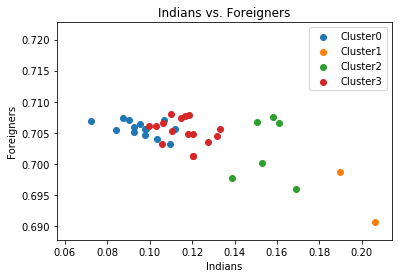

In [47]:
plot_clusters(data1, 'Indians','Foreigners',4)

* In this scatter plot, we can 4 different colurs have been assigned for 4 different groups! 
    * Blue : Low population of Indians and High population of Foreigners
    * Yellow : High population of Indians and low population of Foreigners
    * Green : Moderate population of Indian and low population of Foreigners
    * Red : Moderate population of Foreigners and low population of Indians
* The scatter plot between Indian and Foreigners is quite linear with a negetive slop. It suggests that , in a certain region with population, the number of Indian increases if the the number of Foreigners decreases and viceversa!
* As, we can see there's an unwanted mixer of blue and red dots. This phenomena can't be describe using only two varibales. It may be explainable using other dimensions.

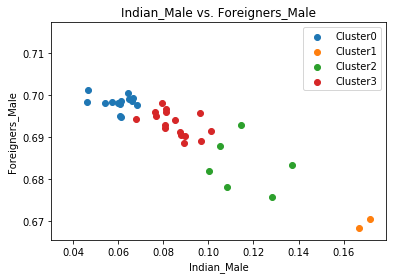

In [48]:
plot_clusters(data1,'Indian_Male','Foreigners_Male',4)

* Here, we can see the clear clusters 
* The relationship between Indian Male and Foreigner Male is linear and the slop is negetive!

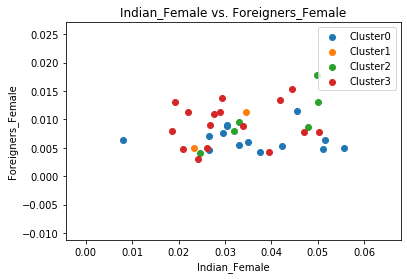

In [49]:
plot_clusters(data1, 'Indian_Female','Foreigners_Female',4)

* The scatter diagram shows a clusters of 4 types though it isn't obvious appearently. This extremely unwanted result can't be described using this two dimensions!

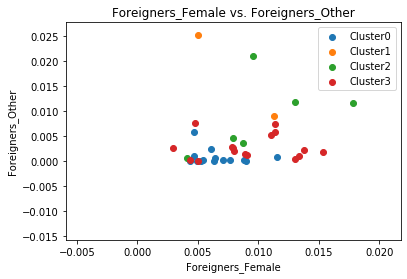

In [51]:
plot_clusters(data1,'Foreigners_Female','Foreigners_Other',4)

* This unwanted result can't be explained using these two variables!

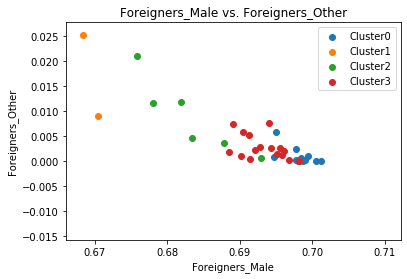

In [52]:
plot_clusters(data1,'Foreigners_Male','Foreigners_Other',4)

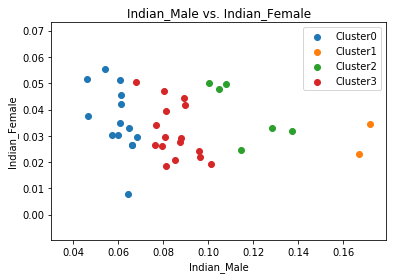

In [53]:
plot_clusters(data1,'Indian_Male','Indian_Female',4)

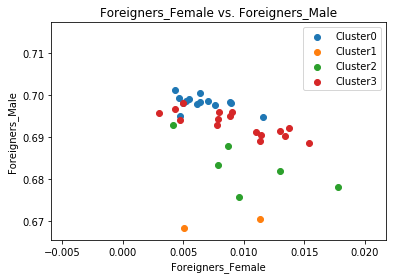

In [54]:
plot_clusters(data1,'Foreigners_Female','Foreigners_Male',4)